In [1]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

# Pretend this is data ingestion

In [2]:
df = pd.read_csv("travel_insurance.csv", encoding="utf-8")
df.columns = [x.replace("(", "").replace(")", "").replace(" ", "_").lower() for x in df.columns]

```SQL
select 
columns_ingested 
from fact_table
left join 
all_other_dim_tables on relevant_keys
```

# Get general intuition of data

In [3]:
df.head()

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_in_value,gender,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency_type           63326 non-null  object 
 2   distribution_channel  63326 non-null  object 
 3   product_name          63326 non-null  object 
 4   claim                 63326 non-null  object 
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net_sales             63326 non-null  float64
 8   commision_in_value    63326 non-null  float64
 9   gender                18219 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [14]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
distribution_channel,63326.0,0.98,0.13,0.0,1.0,1.00,1.00,1.0
claim,63326.0,0.01,0.12,0.0,0.0,0.00,0.00,1.0
duration,63326.0,49.32,101.79,-2.0,9.0,22.00,53.00,4881.0
net_sales,63326.0,40.70,48.85,-389.0,18.0,26.53,48.00,810.0
commision_in_value,63326.0,9.81,19.80,0.0,0.0,0.00,11.55,283.5
age,63326.0,39.97,14.02,0.0,35.0,36.00,43.00,118.0


In [6]:
[[x, len(list(df[x].unique())), df[x].unique()] for x in df.columns if df[x].dtype == "O" ]

[['agency',
  16,
  array(['CBH', 'CWT', 'JZI', 'KML', 'EPX', 'C2B', 'JWT', 'RAB', 'SSI',
         'ART', 'CSR', 'CCR', 'ADM', 'LWC', 'TTW', 'TST'], dtype=object)],
 ['agency_type', 2, array(['Travel Agency', 'Airlines'], dtype=object)],
 ['distribution_channel', 2, array(['Offline', 'Online'], dtype=object)],
 ['product_name',
  26,
  array(['Comprehensive Plan', 'Rental Vehicle Excess Insurance',
         'Value Plan', 'Basic Plan', 'Premier Plan',
         '2 way Comprehensive Plan', 'Bronze Plan', 'Silver Plan',
         'Annual Silver Plan', 'Cancellation Plan',
         '1 way Comprehensive Plan', 'Ticket Protector', '24 Protect',
         'Gold Plan', 'Annual Gold Plan',
         'Single Trip Travel Protect Silver',
         'Individual Comprehensive Plan',
         'Spouse or Parents Comprehensive Plan',
         'Annual Travel Protect Silver',
         'Single Trip Travel Protect Platinum',
         'Annual Travel Protect Gold', 'Single Trip Travel Protect Gold',
         'Ann

In [7]:
df.columns

Index(['agency', 'agency_type', 'distribution_channel', 'product_name',
       'claim', 'duration', 'destination', 'net_sales', 'commision_in_value',
       'gender', 'age'],
      dtype='object')

In [8]:
# Note that there's 2 binary columns in the dataset, might as well map these first
df["distribution_channel"] = df["distribution_channel"].map({"Offline":0, "Online":1})
df["claim"] = df["claim"].map({"No":0, "Yes":1})

<AxesSubplot:>

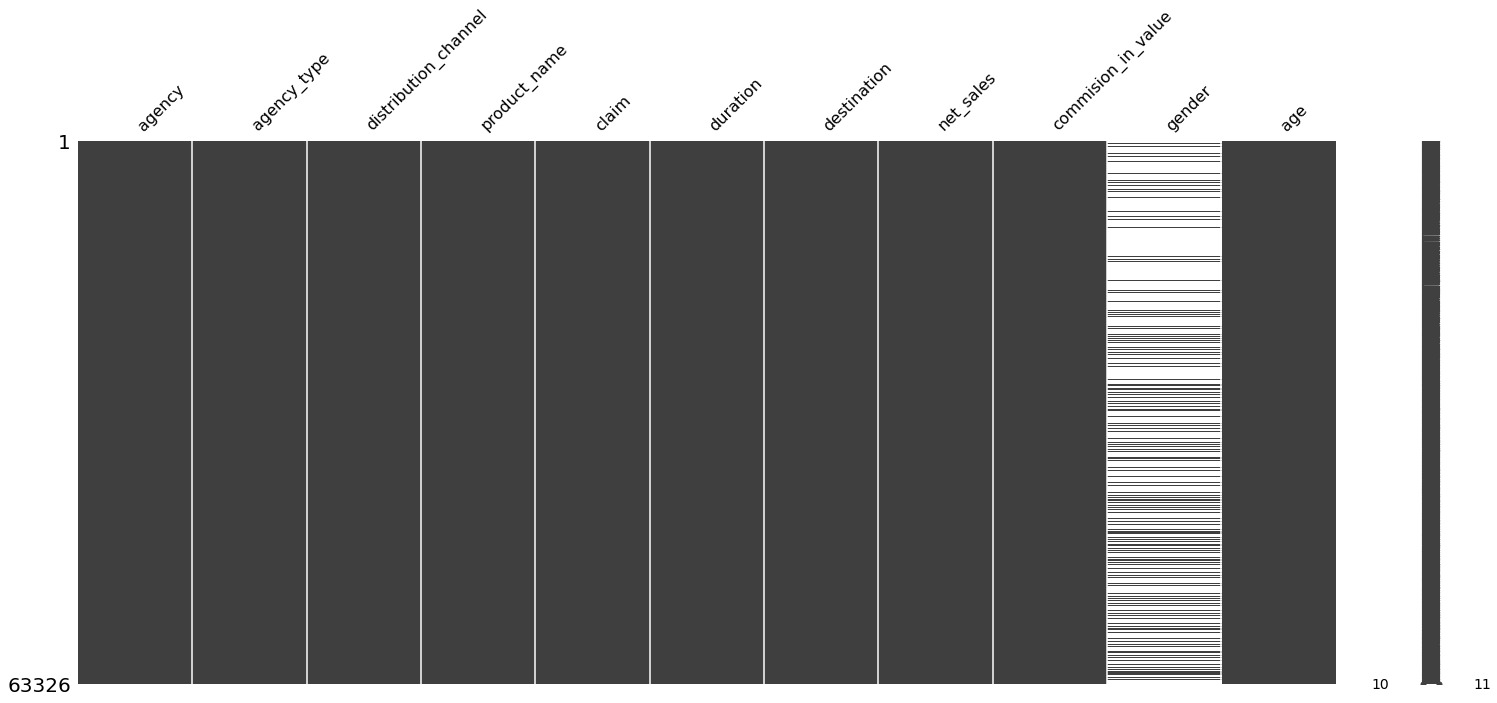

In [9]:
missingno.matrix(df)

decision to drop gender column since ~70% of the values are missing. Throw this into the ```not too add``` bucket

In [10]:
df = df.drop(["gender"], axis=1)

array([[<AxesSubplot:title={'center':'distribution_channel'}>,
        <AxesSubplot:title={'center':'claim'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'net_sales'}>],
       [<AxesSubplot:title={'center':'commision_in_value'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

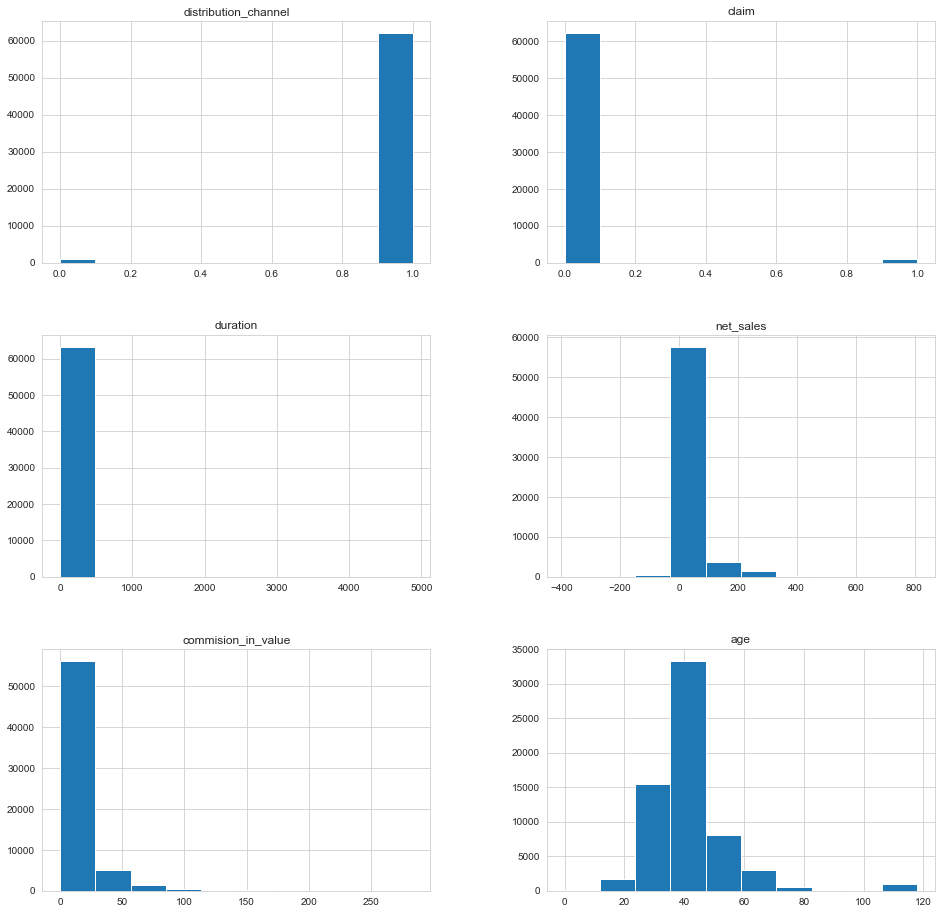

In [12]:
#sns.set_style("whitegrid");
#sns.hist(df.loc[:, [x for x in df.columns if (df[x].dtype == "int64") | (df[x].dtype == "float64")]], hue="claim");
#plt.show()

df.hist(figsize=(16, 16))

<AxesSubplot:>

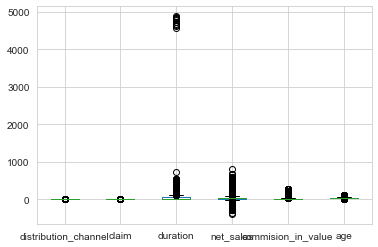

In [13]:
df.boxplot()